In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import glob
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from imblearn.over_sampling import RandomOverSampler, SMOTE
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from torch.optim.lr_scheduler import OneCycleLR
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.nn.utils import clip_grad_norm_
from collections import deque

from models import CreditScoringModel, SimplerCreditScoringModel_v1, AdvancedCreditScoringModel_v1, AdvancedCreditScoringModel_v2
from utils import train_test_model

device = torch.device('cuda')
torch.cuda.empty_cache()

In [3]:
path_train = 'train'
path_test = 'test'
filenames_train = glob.glob(path_train + "/*.csv")
data_files_train = []

for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))

data_train = pd.concat(data_files_train, ignore_index=True)

filenames_test = glob.glob(path_test + "/*.csv")

data_files_test = []

for filename in filenames_test:
    data_files_test.append(pd.read_csv(filename))

data_test = pd.concat(data_files_test, ignore_index=True)
ids = data_test['id']

X_train = data_train.drop(['target', 'smpl', 'id'], axis=1)
y_train = data_train['target']

X_test = data_test.drop(['smpl'], axis=1)

/home/pavel/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 0: Train Loss = 1.779420, Val Loss = 0.938047, AUC Score = 0.641317
Epoch 1: Train Loss = 1.502698, Val Loss = 0.918641, AUC Score = 0.665536
Epoch 2: Train Loss = 1.358658, Val Loss = 0.903462, AUC Score = 0.677798
Epoch 3: Train Loss = 1.252434, Val Loss = 0.885476, AUC Score = 0.687057
Epoch 4: Train Loss = 1.180725, Val Loss = 0.873657, AUC Score = 0.698362
Epoch 5: Train Loss = 1.121621, Val Loss = 0.859782, AUC Score = 0.708278
Epoch 6: Train Loss = 1.073449, Val Loss = 0.849151, AUC Score = 0.715269
Epoch 7: Train Loss = 1.026988, Val Loss = 0.857837, AUC Score = 0.717386
Epoch 8: Train Loss = 0.984457, Val Loss = 0.932760, AUC Score = 0.716514
Epoch 9: Train Loss = 0.947236, Val Loss = 1.041796, AUC Score = 0.716470
Epoch 10: Train Loss = 0.910174, Val Loss = 0.982979, AUC Score = 0.714450
Epoch 11: Train Loss = 0.873626, Val Loss = 1.246306, AUC Score = 0.721943
Epoch 12: Train Loss = 0.839775, Val Loss = 2.108402, AUC Score = 0.718058
Epoch 13: Train Loss = 0.804468, Va

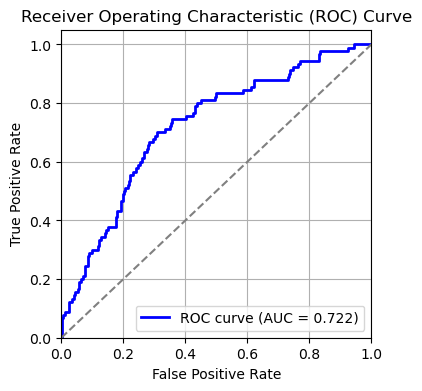

Best model`s AUC score = 0.7219432699083862
target
0.461952    1
0.619725    1
0.118972    1
0.262960    1
0.526582    1
           ..
0.323063    1
0.249733    1
0.178770    1
0.508758    1
0.346821    1
Name: count, Length: 19826, dtype: int64


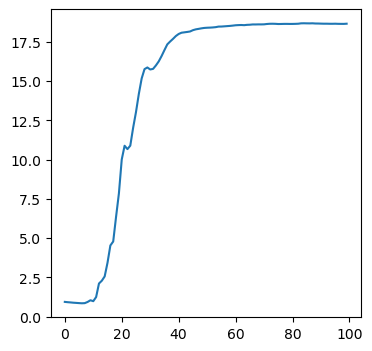

In [14]:
model = SimplerCreditScoringModel_v1(418, droprob = 0.7).double().to(device)
model1, train_losses, val_losses = train_test_model(model, X_train, y_train, batch_size=20000, epochs=100, learning_rate=0.001, resample = False, X_test = X_test, test_size = 0.1)
plt.figure(figsize=(4, 4))
plt.plot(val_losses)
plt.show()
torch.cuda.empty_cache()

In [8]:
model = AdvancedCreditScoringModel_v2(418, droprob = 0.8).double().to(device)
model2, train_losses, val_losses = train_test_model(model, X_train, y_train, batch_size=9000, epochs=50, learning_rate=0.001, resample = True, X_test = X_test, test_size = 0.2)
plt.figure(figsize=(4, 4))
plt.plot(val_losses)
plt.show()
torch.cuda.empty_cache()

/home/pavel/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 0: Train Loss = 1.393077, Val Loss = 0.904003, AUC Score = 0.674982
Epoch 1: Train Loss = 1.160154, Val Loss = 0.946893, AUC Score = 0.677299
Epoch 2: Train Loss = 1.016306, Val Loss = 2.864024, AUC Score = 0.674591
Epoch 3: Train Loss = 0.882780, Val Loss = 1219.616812, AUC Score = 0.687134
Epoch 4: Train Loss = 0.755635, Val Loss = 96618.175697, AUC Score = 0.682980
Epoch 5: Train Loss = 0.643975, Val Loss = 69889.979542, AUC Score = 0.689400
Epoch 6: Train Loss = 0.557223, Val Loss = 38184.076012, AUC Score = 0.684853
Epoch 7: Train Loss = 0.489837, Val Loss = 10973.361243, AUC Score = 0.681575


KeyboardInterrupt: 

In [12]:
model = CreditScoringModel(418, droprob = 0.5).double().to(device)
model3, train_losses, val_losses = train_test_model(model, X_train, y_train, batch_size=15000, epochs=50, learning_rate=0.001, resample = True, X_test = X_test, test_size = 0.2)
plt.figure(figsize=(4, 4))
plt.plot(val_losses)
plt.show() 
torch.cuda.empty_cache()

/home/pavel/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 0: Train Loss = 1.201168, Val Loss = 0.971265, AUC Score = 0.699960
Epoch 1: Train Loss = 1.152131, Val Loss = 4.492131, AUC Score = 0.484639
Epoch 2: Train Loss = 2.936937, Val Loss = 0.926524, AUC Score = 0.664826
Epoch 3: Train Loss = 2.287552, Val Loss = 1.311565, AUC Score = 0.710189
Epoch 4: Train Loss = 1.872212, Val Loss = 12.615184, AUC Score = 0.701999
Epoch 5: Train Loss = 1.583110, Val Loss = 18.757065, AUC Score = 0.701498
Epoch 6: Train Loss = 1.376770, Val Loss = 44.617765, AUC Score = 0.702227
Epoch 7: Train Loss = 1.214802, Val Loss = 90.597565, AUC Score = 0.697531


KeyboardInterrupt: 